In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./DataSet/IPL IMB381IPL2013.csv')
df.head()

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,...,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,...,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000


In [3]:
df.columns

Index(['Sl.NO.', 'PLAYER NAME', 'AGE', 'COUNTRY', 'TEAM', 'PLAYING ROLE',
       'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR', 'BASE PRICE',
       'SOLD PRICE'],
      dtype='object')

In [4]:
x_Features = ['AGE', 'COUNTRY',  'PLAYING ROLE',
       'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL']

In [5]:
categorical_features = ['AGE','COUNTRY','PLAYING ROLE','CAPTAINCY EXP']

In [6]:
encoded_df = pd.get_dummies(df[x_Features],columns=categorical_features, drop_first=True) # Merging

In [7]:
X = encoded_df
Y = df['SOLD PRICE']

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
x_scaler = StandardScaler()
x_scaled = x_scaler.fit_transform(X)
Y = (Y-Y.mean())/Y.std()

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled,Y,test_size=0.2,random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [12]:
linreg.coef_

array([-0.43539611, -0.04632556,  0.50840867, -0.03323988,  0.2220377 ,
       -0.05065703,  0.17282657, -0.49173336,  0.58571405, -0.11654753,
        0.24880095,  0.09546057,  0.16428731,  0.26400753, -0.08253341,
       -0.28643889, -0.26842214, -0.21910913, -0.02622351,  0.24817898,
        0.18760332,  0.10776084,  0.04737488,  0.05191335,  0.01235245,
        0.00547115, -0.03124706,  0.08530192,  0.01790803, -0.05077454,
        0.18745577])

In [13]:
columns_coef_df = pd.DataFrame({'columns':encoded_df.columns,'coef':linreg.coef_})

In [14]:
sorted_coed_vals = columns_coef_df.sort_values('coef',ascending=False)

Text(0, 0.5, 'Features')

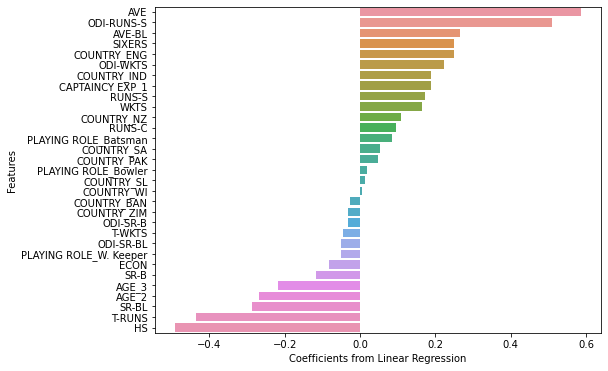

In [15]:
plt.figure(figsize=(8,6))
sns.barplot(x='coef',y='columns',data=sorted_coed_vals)
plt.xlabel('Coefficients from Linear Regression')
plt.ylabel('Features')

In [16]:
from sklearn import metrics
def get_train_test_rmse(model):
    y_train_pred = model.predict(x_train)
    rmse_train = round(np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)),3)
    y_test_pred = model.predict(x_test)
    rmse_test = round(np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)),3)
    print('Train: ',rmse_train,'Test: ',rmse_test)

In [17]:
get_train_test_rmse(linreg)

Train:  0.679 Test:  0.749


In [18]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1,max_iter=500)
ridge.fit(x_train,y_train)
get_train_test_rmse(ridge)

Train:  0.68 Test:  0.724


In [19]:
ridge = Ridge(alpha=2,max_iter=1000)
ridge.fit(x_train,y_train)
get_train_test_rmse(ridge)

Train:  0.682 Test:  0.706


In [20]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01, max_iter=500)
lasso.fit(x_train,y_train)
get_train_test_rmse(lasso)

Train:  0.688 Test:  0.698


In [21]:
lasso_coef_df = pd.DataFrame({'columns':encoded_df.columns,'coef':lasso.coef_})

In [22]:
lasso_coef_df

,columns,coef
0,T-RUNS,-0.301242
1,T-WKTS,-0.000000
2,ODI-RUNS-S,0.413059
3,ODI-SR-B,-0.000000
4,ODI-WKTS,0.157779
5,ODI-SR-BL,-0.035893
6,RUNS-S,0.131827
7,HS,-0.352652
8,AVE,0.458135
9,SR-B,-0.083146


In [23]:
lasso_coef_df[lasso_coef_df.coef==0]

,columns,coef
1,T-WKTS,-0.0
3,ODI-SR-B,-0.0
13,AVE-BL,-0.0
28,PLAYING ROLE_Bowler,0.0


In [28]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha=1.10,l1_ratio=0.001,max_iter=500)
enet.fit(x_train,y_train)
get_train_test_rmse(enet)

Train:  0.793 Test:  0.67
